<a href="https://colab.research.google.com/github/khhaliil/Crab_age_prediction/blob/main/crab_age_predictiion_VIS_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load and split into differnets features

In [ ]:
import pandas as pd

# Replace 'your_file_name.csv' with the name of your uploaded CSV file
train = pd.read_csv('/content/Train.csv')
print(train.head())


  Gender                 Measures                                Weights  Age
0      M      (1.625, 1.3, 0.475)    (14.7133905, 8.674947, 12.65805175)   16
1      M  (1.5875, 1.225, 0.4375)   (17.6617385, 7.66853975, 11.1980525)   11
2      F     (1.675, 1.3, 0.4875)  (21.488921, 10.58853825, 14.33067225)   11
3      M      (1.7375, 1.45, 0.5)   (19.1359125, 13.551061, 15.01106025)   13
4      I     (1.0, 0.7875, 0.225)         (4.2807745, 1.927766, 2.26796)    6


In [ ]:
import pandas as pd

# Replace 'your_file_name.csv' with the name of your uploaded CSV file
test = pd.read_csv('/content/Test.csv')
print(test.head())


  Gender                Measures                              Weights
0      I  (0.775, 0.5875, 0.175)   (1.7860185, 1.14815475, 1.2757275)
1      M   (1.1625, 0.8875, 0.3)  (7.72523875, 2.7499015, 3.95475525)
2      F    (1.0875, 0.875, 0.3)        (5.443104, 2.83495, 3.685435)
3      I  (1.35, 0.9875, 0.3375)    (7.66853975, 4.3941725, 5.443104)
4      I    (0.825, 0.6, 0.1875)    (2.11203775, 0.9355335, 1.360776)


In [ ]:
def Splitter(Data):
    Data['Length'] = Data['Measures'].str.split(',').str[0]
    Data['Length'] = Data['Length'].str.split('(').str[1]

    Data['Diameter'] = Data['Measures'].str.split(',').str[1]


    Data['Height'] = Data['Measures'].str.split(',').str[2]
    Data['Height'] = Data['Height'].str.split(')').str[0]

    Data['Shell'] = Data['Weights'].str.split(',').str[0]
    Data['Shell'] = Data['Shell'].str.split('(').str[1]

    Data['Shucked'] = Data['Weights'].str.split(',').str[1]


    Data['Viscera'] = Data['Weights'].str.split(',').str[2]
    Data['Viscera'] = Data['Viscera'].str.split(')').str[0]

    Data['Length'] = Data['Length'].astype(float)
    Data['Diameter'] = Data['Diameter'].astype(float)
    Data['Height'] = Data['Height'].astype(float)

    Data['Shell'] = Data['Shell'].astype(float)
    Data['Shucked'] = Data['Shucked'].astype(float)
    Data['Viscera'] = Data['Viscera'].astype(float)

    #Data['Volume'] = Data['Height'] *  Data['Diameter'] * Data['Length']
    #Data['total_weight'] = Data['Viscera']*Data['Shucked']*Data['Shell']
    #Data['quotient'] = Data['Volume'] / Data['total_weight']
    Data=Data.drop(["Measures","Weights"],axis=1)

    return Data

In [ ]:
train=Splitter(train)
test=Splitter(test)

In [ ]:
print(train)

     Gender  Age  Length  Diameter  Height      Shell    Shucked    Viscera
0         M   16  1.6250    1.3000  0.4750  14.713390   8.674947  12.658052
1         M   11  1.5875    1.2250  0.4375  17.661738   7.668540  11.198052
2         F   11  1.6750    1.3000  0.4875  21.488921  10.588538  14.330672
3         M   13  1.7375    1.4500  0.5000  19.135912  13.551061  15.011060
4         I    6  1.0000    0.7875  0.2250   4.280774   1.927766   2.267960
...     ...  ...     ...       ...     ...        ...        ...        ...
3109      M   15  1.6500    1.3250  0.4250  16.740380   6.010094  12.842323
3110      F   10  1.2875    1.0375  0.3500   8.830869   4.309124   5.669900
3111      M    8  1.2375    0.9875  0.3000   6.350288   3.898056   4.734367
3112      I    6  0.9250    0.7250  0.2000   3.061746   1.601747   1.984465
3113      M   10  1.5500    1.1875  0.4875  16.825428   9.539607  10.616888

[3114 rows x 8 columns]


# corr maps wiht outilers

               Age       Length     Diameter       Height        Shell  \
count  3114.000000  3114.000000  3114.000000  3114.000000  3114.000000   
mean      9.997431     1.314563     1.024065     0.350951    10.250079   
std       3.249156     0.300372     0.248348     0.107436     6.278581   
min       2.000000     0.275000     0.225000     0.000000     0.070874   
25%       8.000000     1.125000     0.875000     0.287500     5.375774   
50%      10.000000     1.362500     1.062500     0.362500     9.624655   
75%      11.000000     1.537500     1.212500     0.412500    14.298779   
max      29.000000     2.037500     1.625000     2.825000    42.184056   

           Shucked      Viscera     Gender_F     Gender_I     Gender_M  
count  3114.000000  3114.000000  3114.000000  3114.000000  3114.000000  
mean      5.178163     6.883839     0.317919     0.311818     0.370263  
std       3.125191     4.011216     0.465743     0.463310     0.482953  
min       0.056699     0.085048     0.000

<ipython-input-143-3029362ad661>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_encoded.corr()


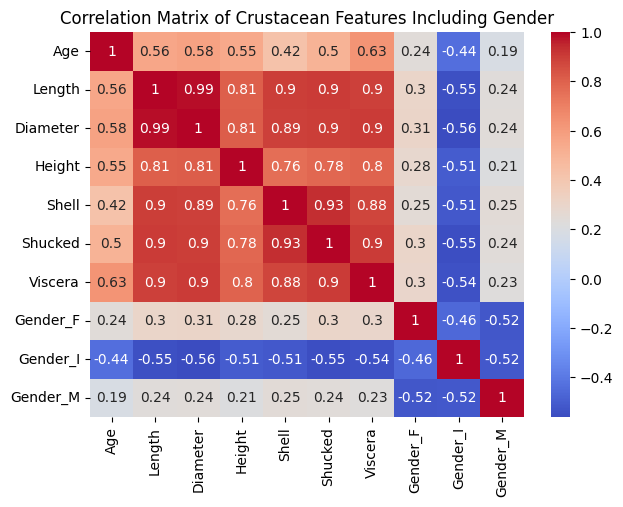

    Gender  Length  Diameter  Height      Shell   Shucked   Viscera
0        I  0.7750    0.5875  0.1750   1.786018  1.148155  1.275727
1        M  1.1625    0.8875  0.3000   7.725239  2.749901  3.954755
2        F  1.0875    0.8750  0.3000   5.443104  2.834950  3.685435
3        I  1.3500    0.9875  0.3375   7.668540  4.394172  5.443104
4        I  0.8250    0.6000  0.1875   2.112038  0.935534  1.360776
..     ...     ...       ...     ...        ...       ...       ...
774      M  1.3125    1.0375  0.3375  11.169703  5.358055  5.726599
775      M  0.3875    0.2750  0.1000   0.184272  0.085048  0.141747
776      I  0.9000    0.6875  0.1875   2.792426  1.247378  1.871067
777      I  1.0875    0.8500  0.3000   5.032036  2.296310  3.543687
778      M  1.4500    1.1125  0.3375  10.701936  5.428929  6.236890

[779 rows x 7 columns]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

gender_dummies = pd.get_dummies(train['Gender'], prefix='Gender')
train_encoded = pd.concat([train, gender_dummies], axis=1)
numeric_columns = ['Age', 'Length', 'Diameter', 'Height', 'Shell', 'Shucked', 'Viscera', 'Gender_M', 'Gender_F', 'Gender_I']
train_encoded[numeric_columns] = train_encoded[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Statistical Summary
print(train_encoded.describe())

# Correlation Matrix
corr_matrix = train_encoded.corr()

# Heatmap of Correlation Matrix
plt.figure(figsize=(7, 5))  # Adjusted the size to accommodate additional columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Crustacean Features Including Gender")
plt.show()

print(test)

           Length    Diameter      Height       Shell     Shucked     Viscera  \
count  779.000000  779.000000  779.000000  779.000000  779.000000  779.000000   
mean     1.298283    1.008216    0.343068   10.036505    4.970188    6.444089   
std      0.300505    0.247524    0.094307    6.263151    3.014715    3.640972   
min      0.187500    0.137500    0.025000    0.028349    0.014175    0.042524   
25%      1.125000    0.862500    0.275000    5.145434    2.551455    3.572037   
50%      1.337500    1.037500    0.350000    9.284461    4.649318    6.109317   
75%      1.525000    1.187500    0.412500   14.167663    6.995239    8.930093   
max      2.000000    1.575000    0.625000   35.309302   16.726205   19.235136   

         Gender_F    Gender_I    Gender_M  
count  779.000000  779.000000  779.000000  
mean     0.301669    0.336329    0.362003  
std      0.459277    0.472756    0.480888  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%   

<ipython-input-147-f57e591b9a14>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_corr_matrix = test_encoded.corr()


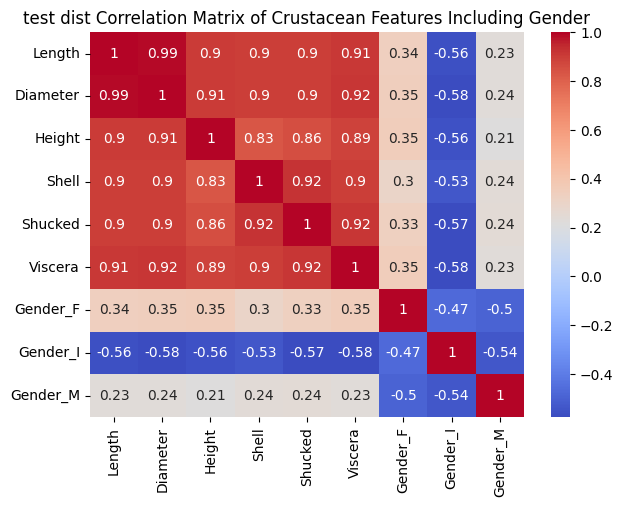

In [ ]:


gender_dummies = pd.get_dummies(test['Gender'], prefix='Gender')
test_encoded = pd.concat([test, gender_dummies], axis=1)
test_numeric_columns = [ 'Length', 'Diameter', 'Height', 'Shell', 'Shucked', 'Viscera', 'Gender_M', 'Gender_F', 'Gender_I']
test_encoded[test_numeric_columns] = test_encoded[test_numeric_columns].apply(pd.to_numeric, errors='coerce')

# Statistical Summary
print(test_encoded.describe())

# Correlation Matrix
test_corr_matrix = test_encoded.corr()

# Heatmap of Correlation Matrix
plt.figure(figsize=(7, 5))  # Adjusted the size to accommodate additional columns
sns.heatmap(test_corr_matrix, annot=True, cmap='coolwarm')
plt.title("test dist Correlation Matrix of Crustacean Features Including Gender")
plt.show()

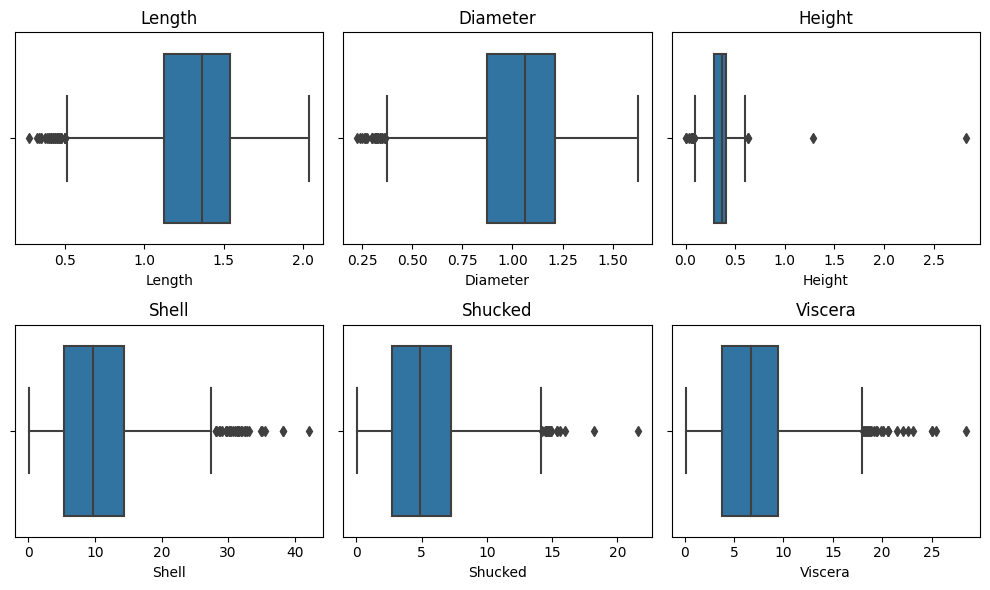

In [ ]:
numeric_columns1 = ['Length', 'Diameter', 'Height', 'Shell', 'Shucked', 'Viscera']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Loop through each numeric column and create a box plot
for i, col in enumerate(numeric_columns1):
    row = i // 3  # Integer division to determine the row
    col_idx = i % 3  # Modulo operation to determine the column
    sns.boxplot(x=train[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

#outiler remover





In [ ]:
def remove_outliers(data,X,tolerance=1.7):
    column_data = data[X]
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1

    # Step 3: Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - tolerance * IQR
    upper_bound = Q3 + tolerance * IQR

    # Step 4: Identify and remove outliers from the DataFrame
    outliers = data[(column_data < lower_bound) | (column_data > upper_bound)]
    Train = data[(column_data >= lower_bound) & (column_data <= upper_bound)]
    return Train
train=remove_outliers(train,'Length')
train=remove_outliers(train,'Diameter')
train=remove_outliers(train,'Height')
#train=remove_outliers(train,'Shell')
train=remove_outliers(train,'Shucked')
train=remove_outliers(train,'Viscera')

               Age       Length     Diameter       Height        Shell  \
count  2944.000000  2944.000000  2944.000000  2944.000000  2944.000000   
mean     10.006793     1.316194     1.025106     0.349350     9.955696   
std       3.129109     0.269584     0.224964     0.087024     5.550619   
min       3.000000     0.600000     0.437500     0.125000     0.666213   
25%       8.000000     1.137500     0.875000     0.287500     5.482085   
50%      10.000000     1.362500     1.062500     0.350000     9.518345   
75%      11.000000     1.525000     1.200000     0.412500    13.965672   
max      29.000000     1.900000     1.500000     0.575000    25.953967   

           Shucked      Viscera     Gender_F     Gender_I     Gender_M  
count  2944.000000  2944.000000  2944.000000  2944.000000  2944.000000  
mean      5.045128     6.684589     0.321332     0.309103     0.369565  
std       2.812481     3.520308     0.467067     0.462202     0.482769  
min       0.226796     0.481942     0.000

<ipython-input-153-a0b55a661530>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_encoded.corr()


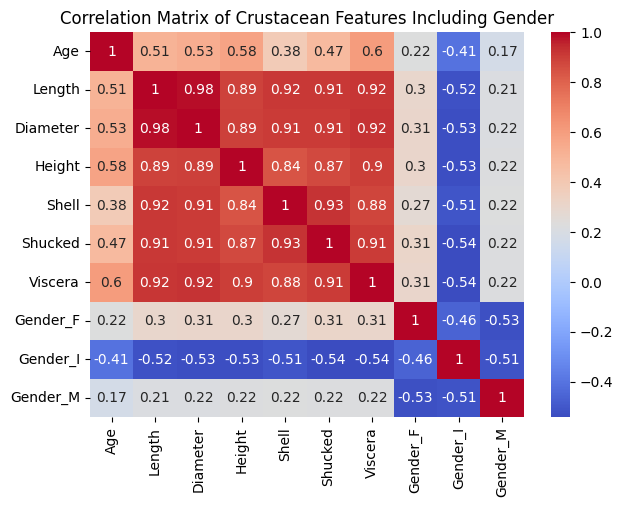

In [ ]:
gender_dummies = pd.get_dummies(train['Gender'], prefix='Gender')
train_encoded = pd.concat([train, gender_dummies], axis=1)
numeric_columns = ['Age', 'Length', 'Diameter', 'Height', 'Shell', 'Shucked', 'Viscera', 'Gender_M', 'Gender_F', 'Gender_I']
train_encoded[numeric_columns] = train_encoded[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Statistical Summary
print(train_encoded.describe())

# Correlation Matrix
corr_matrix = train_encoded.corr()

# Heatmap of Correlation Matrix
plt.figure(figsize=(7, 5))  # Adjusted the size to accommodate additional columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Crustacean Features Including Gender")
plt.show()

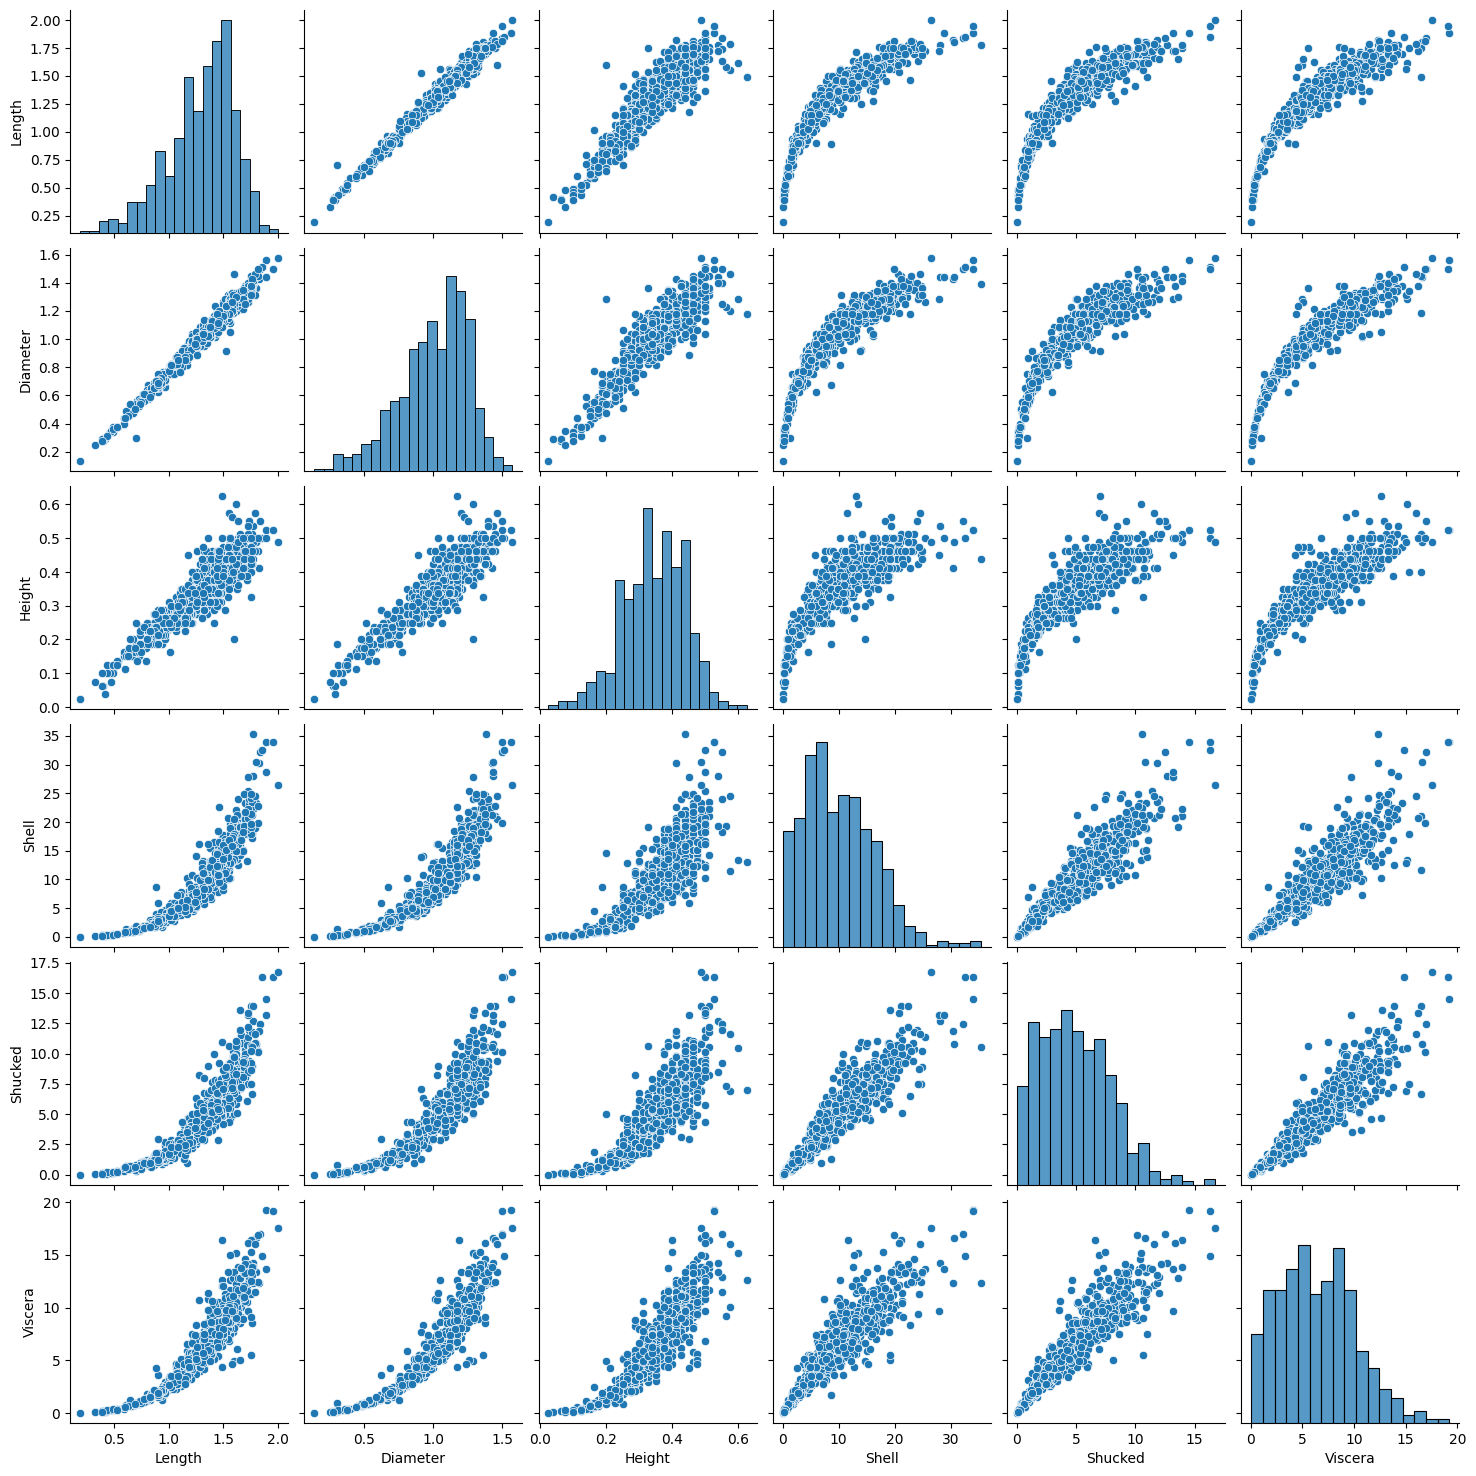

In [ ]:
sns.pairplot(test)

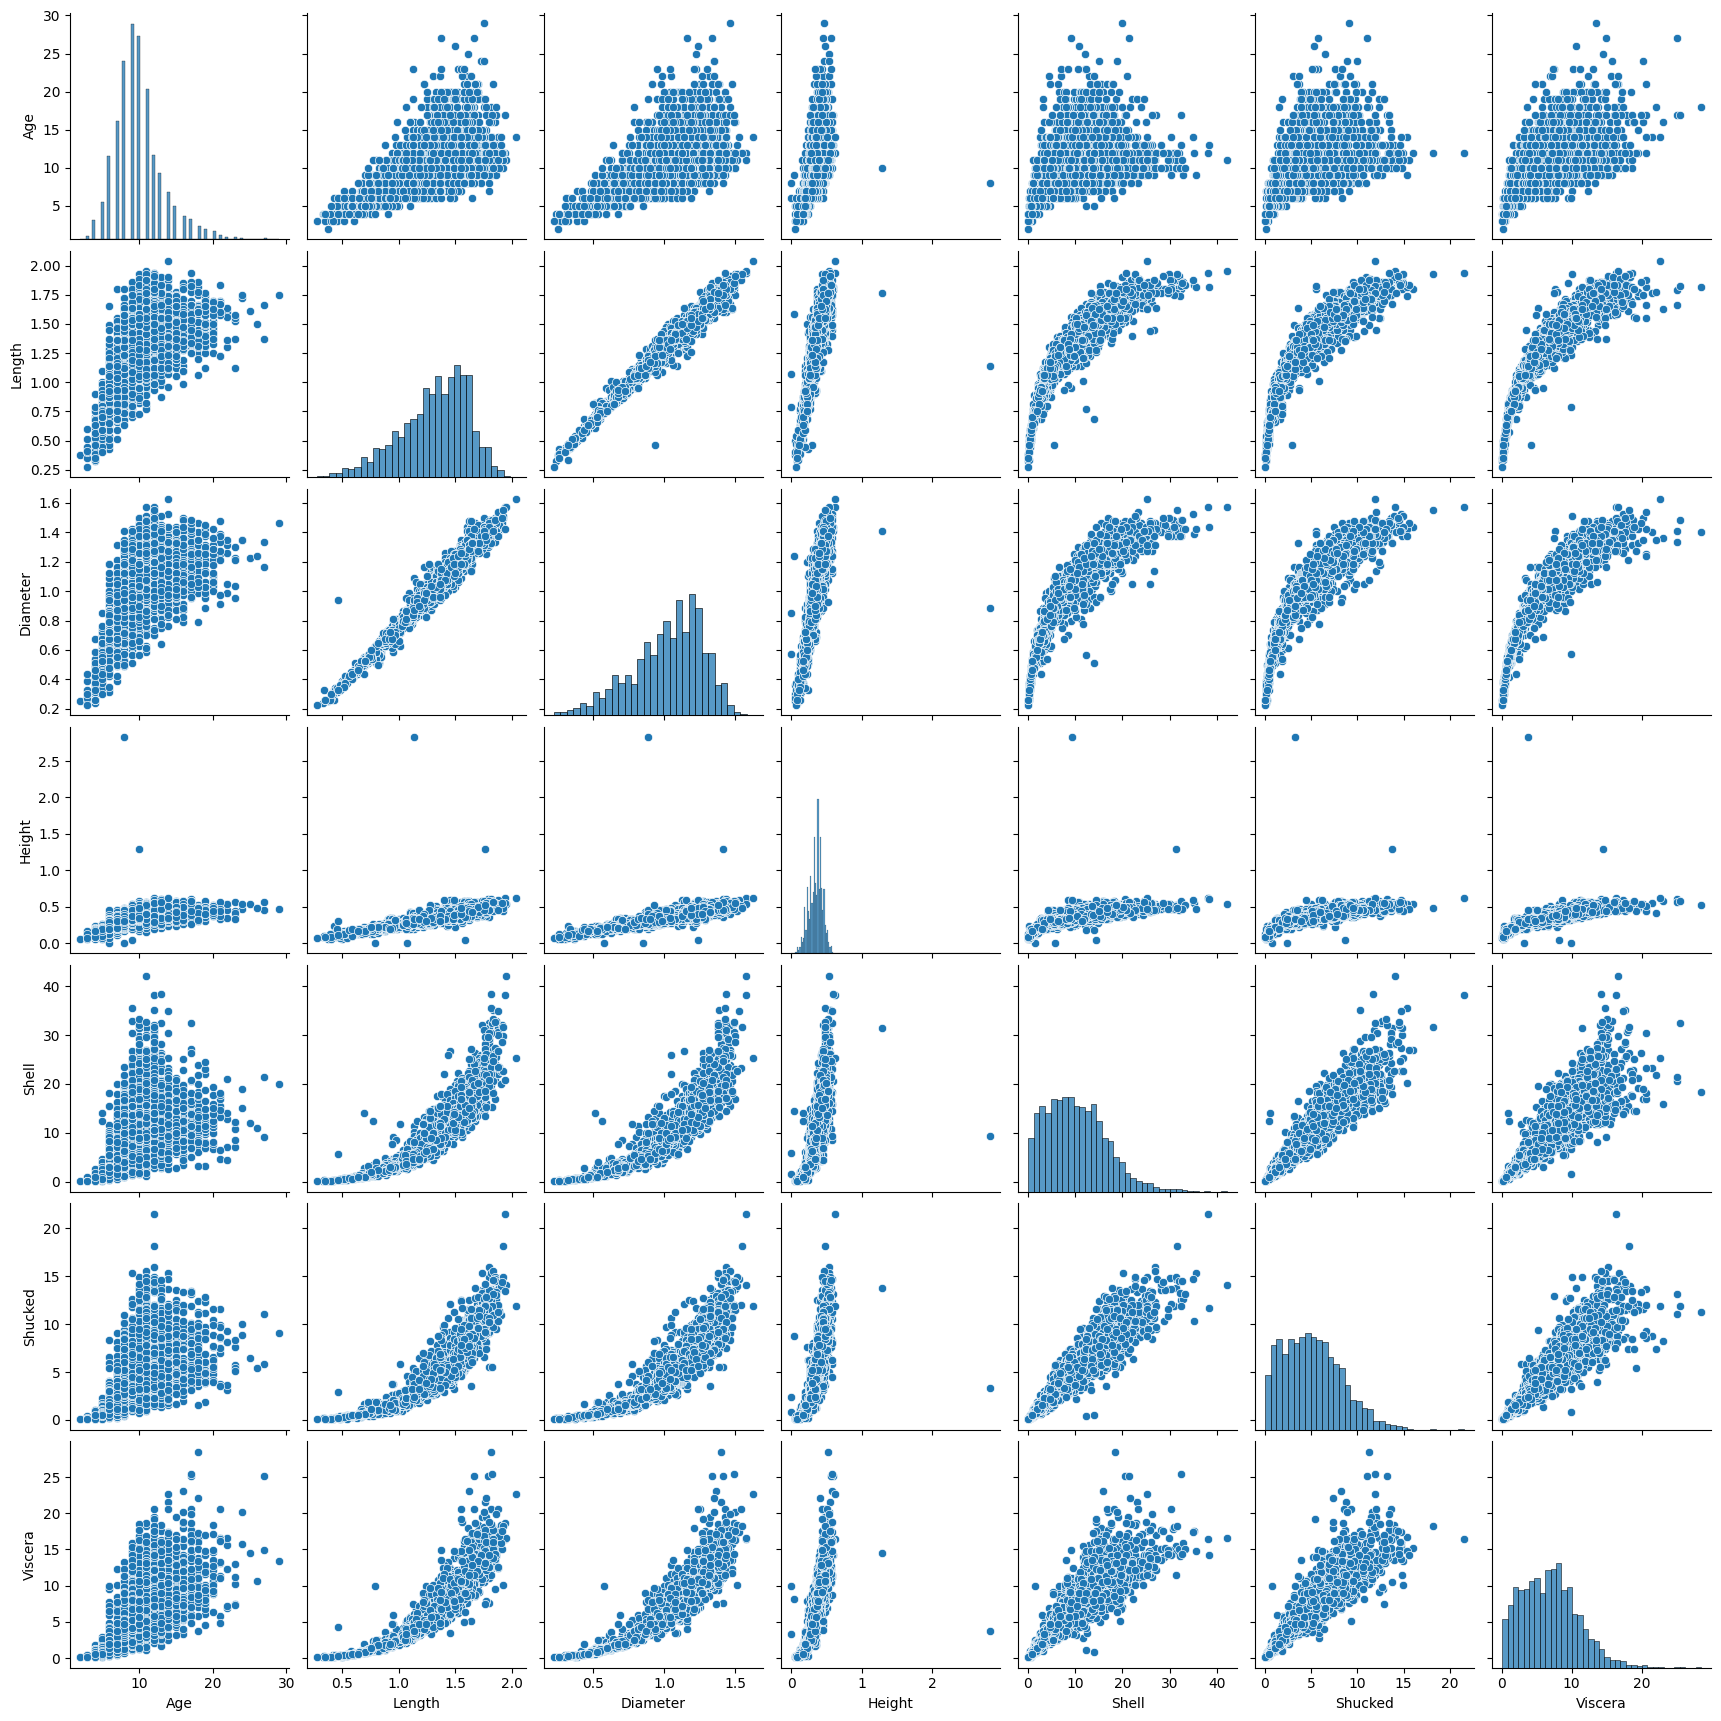

In [ ]:
sns.pairplot(train)